# 📘 AI/ML Assignment 3
## Supervised Learning Models in Practice

**Total Marks: 100**  
**Submission Format:** Single Jupyter Notebook (`.ipynb`)

---
## 📌 General Instructions (Read Carefully)

- This assignment covers **Modules 13–18**.
- Use **Python and scikit-learn only**.
- Do NOT use AutoML, deep learning, or external ML libraries.
- Fix `random_state=42` wherever applicable.
- Plots must be labeled and readable.
- Do not delete or rename cells.

***Classification Dataset:*** https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data/data

***Regresssion Dataset:*** https://www.kaggle.com/datasets/mirichoi0218/insurance

## 🔧 TODO 0: Environment Setup (5 Marks)
**Marks Breakdown:**
- Correct imports (3)
- Clean setup, no unused imports (2)


In [39]:
# TODO: Import all necessary libraries here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import r2_score,root_mean_squared_error,mean_absolute_error,accuracy_score,precision_score,recall_score,confusion_matrix
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR,SVC
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# 🔵 PART A: Regression Task (45 Marks)
You will work with the provided **regression dataset**.


## TODO A1: Dataset Loading and Understanding (5 Marks)
**You must:**
- Load the dataset
- Show shape and column names
- Identify target variable

**Marks:** Data loading (2), Explanation (3)


In [40]:
# TODO: Load regression dataset
df = pd.read_csv('insurance.csv')
print('Shape of the data frame:',df.shape)
print('Column names:',df.columns)
print('Target variable "charges"')

Shape of the data frame: (1338, 7)
Column names: Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')
Target variable "charges"


## TODO A2: Exploratory Data Analysis (EDA) (5 Marks)
**You must:**
- Show descriptive statistics
- Plot correlation heatmap
- Plot at least one feature vs target

**Marks:** Plots (3), Interpretation (2)


In [41]:
# TODO: Perform EDA
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


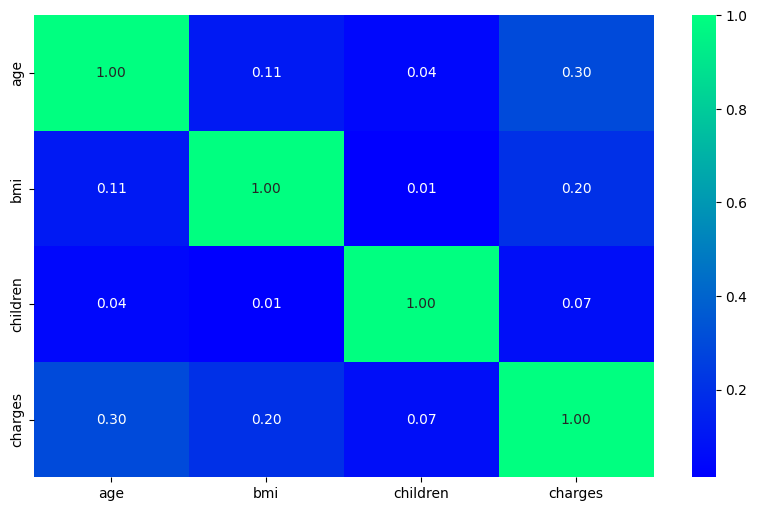

In [42]:
# Correlation Heatmap
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True,cmap='winter',fmt='.2f')
plt.show()

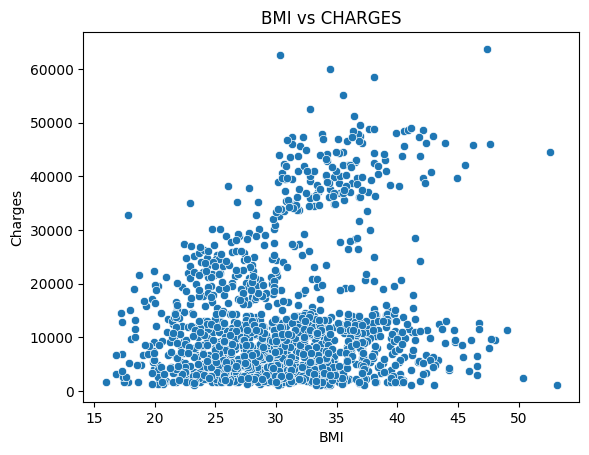

In [43]:
sns.scatterplot(data=df,x=df['bmi'],y=df['charges'])
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('BMI vs CHARGES')
plt.show()

## TODO A3: Feature Preparation (5 Marks)
**You must:**
- Train-test split
- Scaling (if applicable)

**Marks:** Correct split (3), Explanation (2)


In [44]:
# TODO: Prepare features
df = df.drop_duplicates()
df_encoded = pd.get_dummies(data=df,columns=['sex','smoker','region'],dtype=int)

In [45]:
X = df_encoded.drop(columns=['charges'])
y = df_encoded['charges']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=42)

## TODO A4: Multiple Linear Regression (8 Marks)
**You must:**
- Train model
- Evaluate using RMSE, MAE, R²

**Marks:** Model (4), Metrics (4)


In [46]:
# TODO: Multiple Linear Regression
reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print('RMSE',root_mean_squared_error(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('R2',r2_score(y_test,y_pred))

RMSE 5956.342894363589
MAE 4177.045561036322
R2 0.8069287081198011


## TODO A5: Polynomial Regression (7 Marks)
**You must:**
- Apply polynomial features
- Compare with linear regression

**Marks:** Implementation (4), Comparison (3)


In [47]:
# TODO: Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
reg.fit(X_train_poly,y_train)
y_pred_poly = reg.predict(X_test_poly)
print('RMSE',root_mean_squared_error(y_test,y_pred_poly))
print('MAE',mean_absolute_error(y_test,y_pred_poly))
print('R2',r2_score(y_test,y_pred_poly))
# After using polynomial regression, rmse,mae decreased a lot and r2 score increased. Which is a positive sign
# that polynomial regression works better than linear regresssion in this scenario.

RMSE 4646.056793068929
MAE 2867.317439475283
R2 0.8825298972468523


## TODO A6: Support Vector Regression (7 Marks)
**You must:**
- Train SVR (RBF kernel)
- Evaluate performance
- Justify kernel choice

**Marks:** Model (4), Justification (3)


In [48]:
# TODO: Support Vector Regression
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
svr = SVR(kernel='rbf',C=100,gamma=.1)
svr.fit(X_train,y_train)
y_pred_svr = svr.predict(X_test)
print('RMSE',root_mean_squared_error(y_test,y_pred_svr))
print('MAE',mean_absolute_error(y_test,y_pred_svr))
print('R2',r2_score(y_test,y_pred_svr))

RMSE 11782.717627149286
MAE 6524.924502742616
R2 0.24447426861470622


## TODO A7: Random Forest Regressor (8 Marks)
**You must:**
- Train Random Forest
- Evaluate model

**Marks:** Model (4), Evaluation (4)


In [49]:
# TODO: Random Forest Regressor
reg = RandomForestRegressor(n_estimators=200,n_jobs=-1,random_state=42)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print('RMSE',root_mean_squared_error(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('R2',r2_score(y_test,y_pred))

RMSE 4639.460940432408
MAE 2555.16004370224
R2 0.8828631973038793


# 🟠 PART B: Classification Task (45 Marks)
You will work with the provided **classification dataset**.


## TODO B1: Dataset Understanding (5 Marks)
**You must:**
- Load dataset
- Show class distribution
- Comment on imbalance

**Marks:** Analysis (3), Explanation (2)


In [50]:
# TODO: Load classification dataset
df = pd.read_csv('loan_data.csv')
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


## TODO B2: Exploratory Data Analysis (5 Marks)
**You must:**
- Plot class counts
- Plot at least one feature vs class

**Marks:** Plots (5),


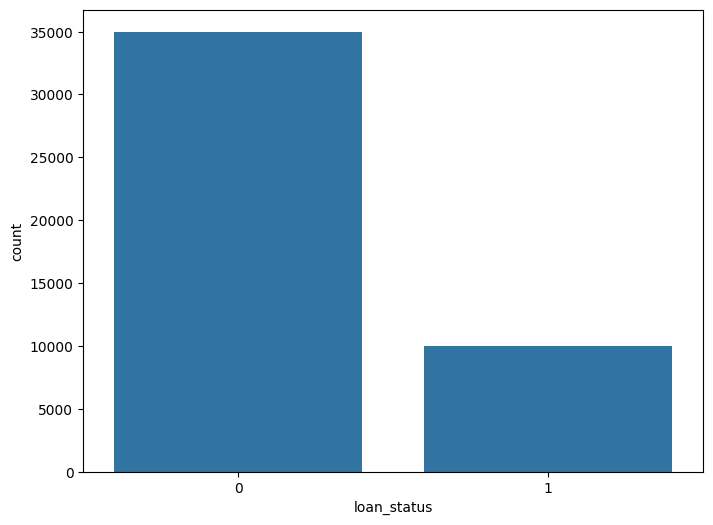

In [51]:
# TODO: Classification EDA
plt.figure(figsize=(8,6))
sns.countplot(data=df,x=df['loan_status'])
plt.show()

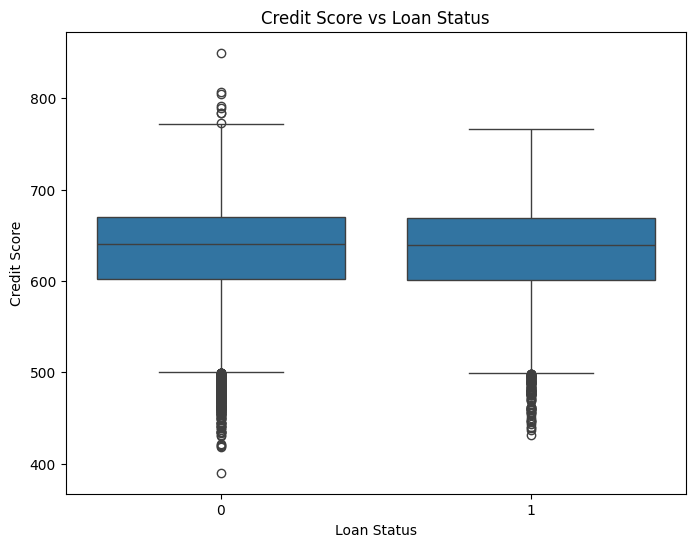

In [52]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df,x=df['loan_status'], y=df['credit_score'])
plt.title('Credit Score vs Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Credit Score')
plt.show()

## TODO B3: Feature Preparation (5 Marks)
**You must:**
- Encoding (if needed)
- Scaling
- Train-test split with stratification




In [53]:
categorical = [
    'person_gender',
    'person_education',
    'person_home_ownership',
    'loan_intent',
    'previous_loan_defaults_on_file'
]
df_encoded = pd.get_dummies(df,columns=categorical,dtype=int)
df_encoded.head()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status,person_gender_female,...,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_No,previous_loan_defaults_on_file_Yes
0,22.0,71948.0,0,35000.0,16.02,0.49,3.0,561,1,1,...,0,1,0,0,0,0,1,0,1,0
1,21.0,12282.0,0,1000.0,11.14,0.08,2.0,504,0,1,...,1,0,0,1,0,0,0,0,0,1
2,25.0,12438.0,3,5500.0,12.87,0.44,3.0,635,1,1,...,0,0,0,0,0,1,0,0,1,0
3,23.0,79753.0,0,35000.0,15.23,0.44,2.0,675,1,1,...,0,1,0,0,0,1,0,0,1,0
4,24.0,66135.0,1,35000.0,14.27,0.53,4.0,586,1,0,...,0,1,0,0,0,1,0,0,1,0


In [54]:
# TODO: Prepare classification features
X = df_encoded.drop(columns=['loan_status'])
y = df_encoded['loan_status']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=42,stratify=y)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## TODO B4: Logistic Regression with L2 (8 Marks)
**You must:**
- Train Logistic Regression
- Evaluate using Accuracy, Precision, Recall
- Show Confusion Matrix

**Marks:** Model (4), Metrics (4)


In [55]:
# TODO: Logistic Regression
lg = LogisticRegression()
lg.fit(X_train_scaled,y_train)
y_pred = lg.predict(X_test_scaled)
print('Accuracy',accuracy_score(y_test,y_pred))
print('Precision',precision_score(y_test,y_pred))
print('Recall',recall_score(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
print('Confusion matrix\n',cm)

Accuracy 0.8996666666666666
Precision 0.7891407485503427
Recall 0.7485
Confusion matrix
 [[6600  400]
 [ 503 1497]]


## TODO B5: Support Vector Machine (7 Marks)
**You must:**
- Train SVM (Linear or RBF)
- Evaluate

**Marks:** Model (4), Evaluation (3)


In [56]:
# TODO: SVM Classification
svc = SVC(
    kernel='rbf',
    C=1.0,
    gamma='scale',
    random_state=42
)
svc.fit(X_train_scaled, y_train)
y_pred = svc.predict(X_test_scaled)
print('Accuracy',accuracy_score(y_test,y_pred))
print('Precision',precision_score(y_test,y_pred))
print('Recall',recall_score(y_test,y_pred))

Accuracy 0.9154444444444444
Precision 0.846670397313934
Recall 0.7565


## TODO B6: Naive Bayes (5 Marks)
**You must:**
- Choose correct NB variant



In [57]:
# TODO: Naive Bayes
nb = GaussianNB()
nb.fit(X_train_scaled,y_train)
y_pred = nb.predict(X_test_scaled)
print('Accuracy',accuracy_score(y_test,y_pred))
print('Precision',precision_score(y_test,y_pred))
print('Recall',recall_score(y_test,y_pred))

Accuracy 0.7348888888888889
Precision 0.4559561843906892
Recall 0.999


## TODO B7: K-Nearest Neighbors (5 Marks)
**You must:**
- Try multiple K values
- Plot accuracy vs K

**Marks:** Experiment (3), Plot & choice (2)


In [58]:
# TODO: KNN
vals = range(1,30)
acc = []
for k in vals:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled,y_train)
    y_pred = knn.predict(X_test_scaled)
    acc.append(accuracy_score(y_test,y_pred))

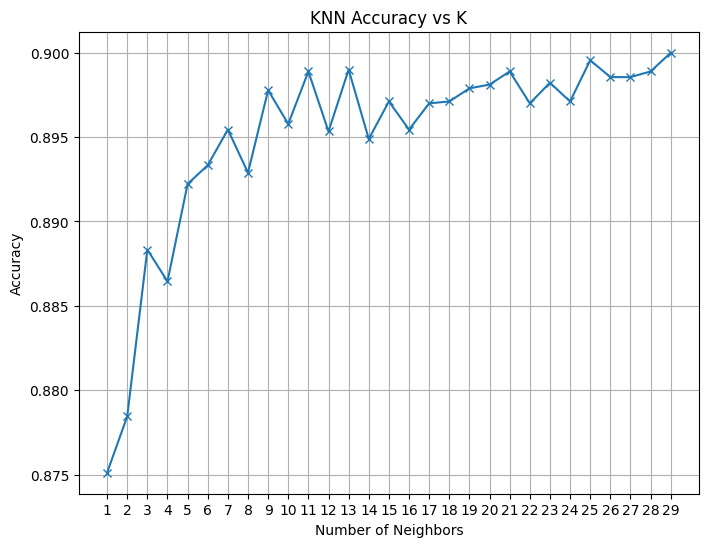

In [59]:
plt.figure(figsize=(8,6))
plt.plot(vals, acc, marker='x')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs K')
plt.xticks(vals)
plt.grid(True)
plt.show()

## TODO B8: Random Forest Classifier (5 Marks)
**You must:**
- Train model
- Show feature importance

**Marks:** Model (3), Interpretation (2)


In [60]:
# TODO: Random Forest Classifier
rf = RandomForestClassifier(n_estimators=200,n_jobs=-1,random_state=42)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.9296666666666666

In [61]:
importances = pd.Series(
    rf.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)
importances.head(5)

loan_int_rate                         0.149396
loan_percent_income                   0.147339
previous_loan_defaults_on_file_No     0.130392
previous_loan_defaults_on_file_Yes    0.125185
person_income                         0.115413
dtype: float64

# 🧠 Final Reflection (5 Marks)
**Answer briefly:**
- Best regression model and why
- Best classification model and why
- One real-world deployment scenario


## TODO: Write your reflection here

In [62]:
# Random forest regressor hits the highest r2 score and precision score, because it can capture complex non-linear patterns.

# In classification task, both support vector machine and random forest works well but I would choose Random forest because it hits 92 percent accuracy. Because this model does not affect too much by outliers. Also this is an ensemble based approach which use multiple decision tree, thats why it gives us maximum accuracy.

#This system can be deployed in a financial institution or bank for loan  and risk prediction.The classification model can identify risk applicants, on the other hand the regression model can be used to predict financial risk, this will help company to make more accurate decisions.